### Development and Implementation of AI for Moderating the CONSUL Platform

# About Dataset
### Context
I've been looking for an open-domain Conversational dataset for training chatbots. I was inspired by the work done by Google Brain in 'Towards a Human-like Open-Domain Chatbot'. While Transformers/BERT are trained on all of Wikipedia, chatbots need a dataset based on conversations.

### Content
This data came from Reddit posts/comments under the r/CasualConversation subreddit. The conversations under this subreddit were significantly more 'conversation like' when compared to other subreddits (Ex. r/AskReddit). I'm currently looking for other subreddits to scrape.

This dataset consists of 3 columns, where each row is a Length-3 conversation. For example:

- 0 - What kind of phone(s) do you guys have?
- 1 - I have a pixel. It's pretty great. Much better than what I had before.
- 2 - Does it really charge all the way in 15 min?

This data was collected between 2016-12-29 and 2019-12-31


**WE WILL USE COLUMN 3(2 - Does it really charge all the way in 15 min?) IN THE WORK BELOW**

# Argument Clustering

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: casual_data_windows.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("casual_data_windows.csv")[0:500]
df.head()

,Unnamed: 0,0,1,2
0,0,What kind of phone(s) do you guys have?,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?
1,1,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?,"Pretty fast. I've never timed it, but it's und..."
2,2,Does it really charge all the way in 15 min?,"Pretty fast. I've never timed it, but it's und...","cool. I've been thinking of getting one, my ph..."
3,3,What kind of phone(s) do you guys have?,Samsung Galaxy J1. It's my first cell phone an...,What do you think of it? Anything you don't like?
4,4,Samsung Galaxy J1. It's my first cell phone an...,What do you think of it? Anything you don't like?,I love it. I can't think of anything I don't l...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Example dataset of comments (expanded dataset)
comments = df['2']

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})
print(comments_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               comment  cluster
0         Does it really charge all the way in 15 min?        2
1    Pretty fast. I've never timed it, but it's und...        2
2    cool. I've been thinking of getting one, my ph...        2
3    What do you think of it? Anything you don't like?        2
4    I love it. I can't think of anything I don't l...        0
..                                                 ...      ...
495  There's someone out there for everyone. Don't ...        2
496  no no seeing side boob ;) but that works too lol         2
497  How would seeing sideboob work out before touc...        2
498  Like how it would be beneficial? What do you m...        2
499  He can just go out in public and do that. You'...        1

[500 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


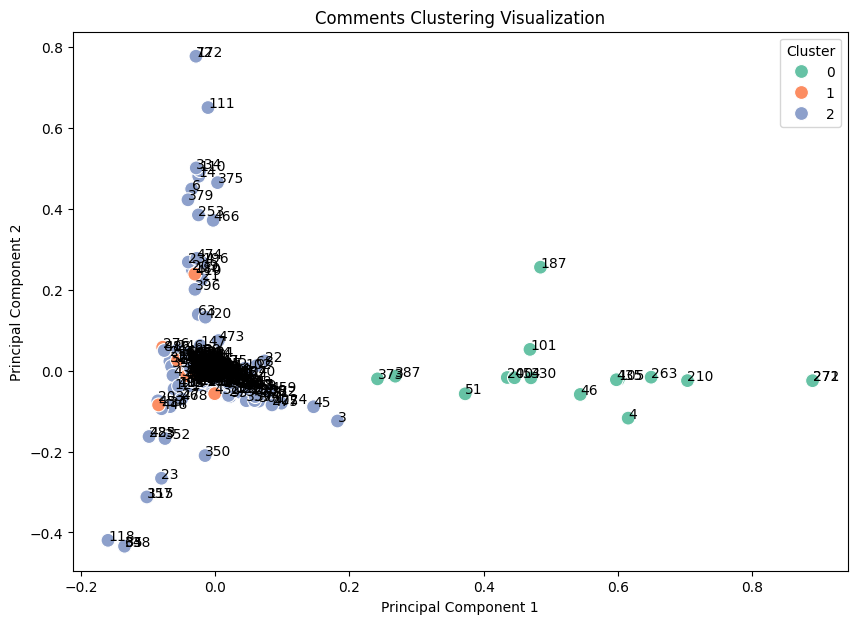

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

# Example dataset of comments (expanded dataset)
comments = df['2']

# Vectorizing comments
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Clustering comments
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Clustering results
clusters = kmeans.labels_
comments_df = pd.DataFrame({'comment': comments, 'cluster': clusters})

# PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Creating a DataFrame with PCA results and clusters
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = clusters
pca_df['comment'] = comments

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.principal_component_1[i], pca_df.principal_component_2[i], str(i))
plt.title('Comments Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


<ipython-input-14-a65768c75d70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=comments_df, palette='Set2')


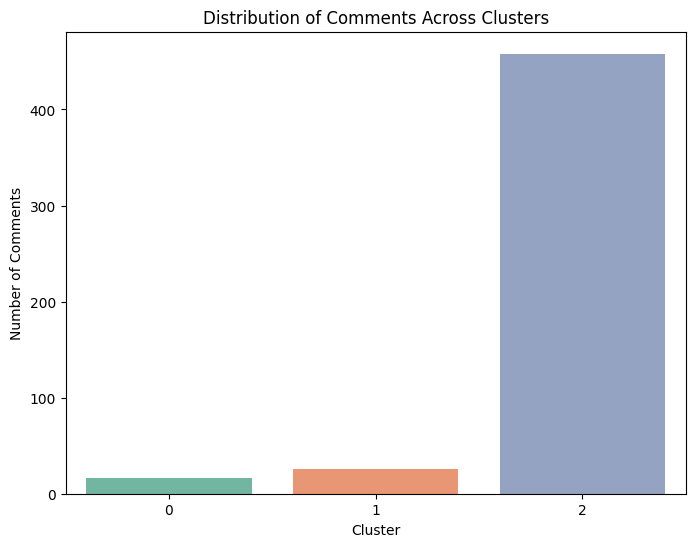

In [ ]:
# Plot 1: Distribution of Comments Across Clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=comments_df, palette='Set2')
plt.title('Distribution of Comments Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Comments')
plt.show()

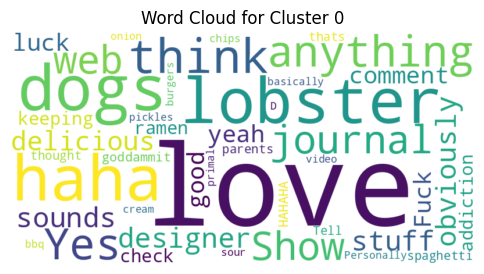

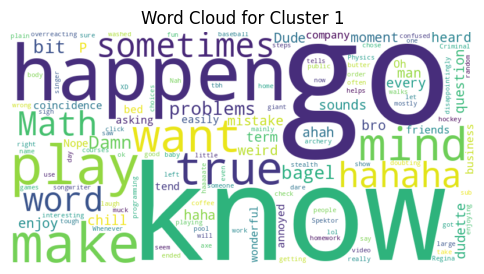

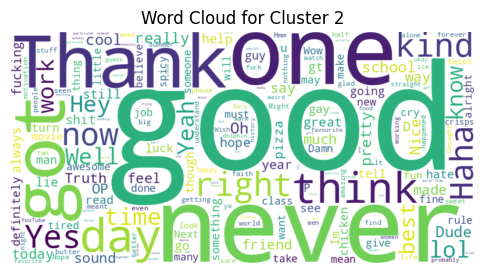

In [ ]:
# Plot 2: Word Cloud for Each Cluster
from wordcloud import WordCloud

for cluster in range(num_clusters):
    cluster_comments = ' '.join(comments_df[comments_df['cluster'] == cluster]['comment'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_comments)

    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

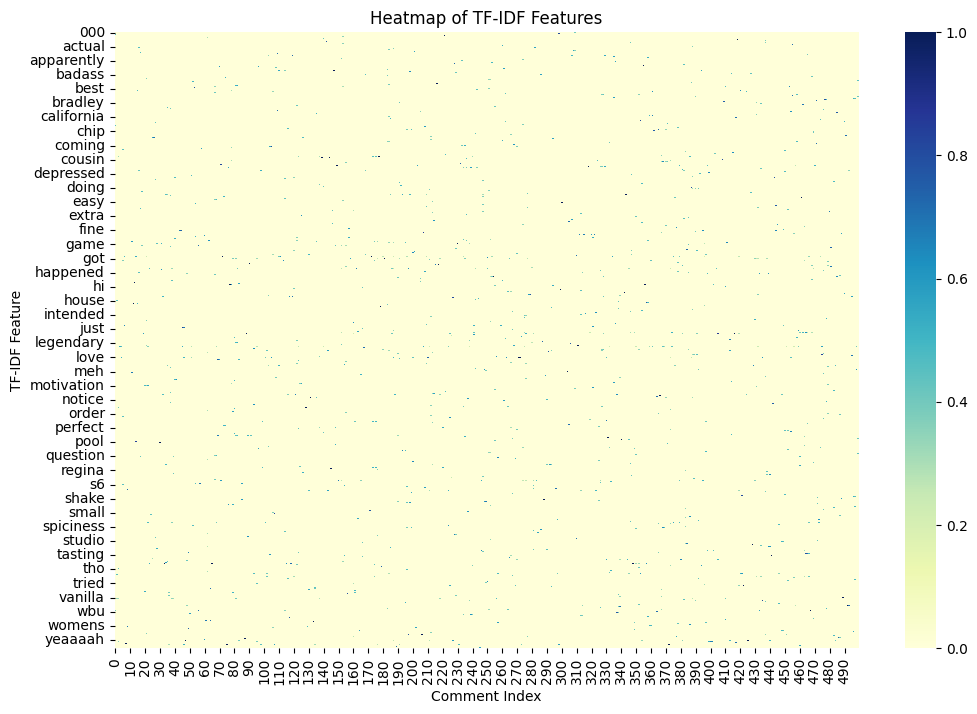

In [ ]:
# Plot 3: Heatmap of TF-IDF Features
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.T, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of TF-IDF Features')
plt.xlabel('Comment Index')
plt.ylabel('TF-IDF Feature')
plt.show()

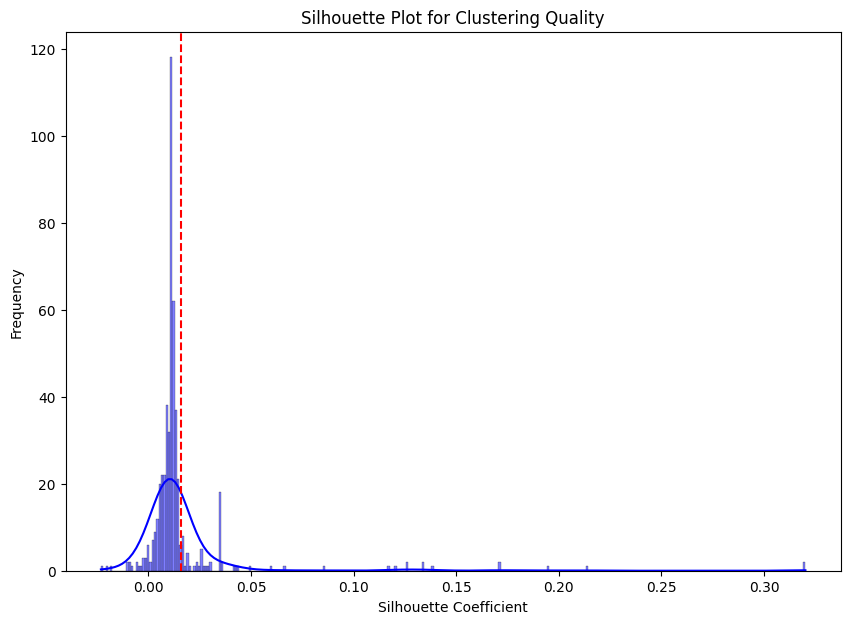

In [ ]:
# Plot 4: Silhouette Plot for Clustering Quality
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X, clusters)
silhouette_avg = silhouette_score(X, clusters)

plt.figure(figsize=(10, 7))
sns.histplot(silhouette_vals, kde=True, color='blue')
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot for Clustering Quality')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')
plt.show()

# Automatic Summarization

In [ ]:
from transformers import pipeline

# Using a pre-trained model for summarization
summarizer = pipeline("summarization")

# Example discussion topic (expanded text)
discussion_topic = df['2'][:50]


# Summarizing the topic
for i in discussion_topic:
  leng = i.split()
  if len(leng) > 15:
    summary = summarizer(i, max_length=15, min_length=10, do_sample=False)
    print(summary[0]['summary_text'])



No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 I can think of a few complaints for my S6,
 Life isnt worth living if you didnt have a good bang
 In my 6 class textbook (and 7th class extra book
 I totally did not cry. Durin the ceremony anyway.
 Yes I understand that, you folks don't use dud
 When that happens, I tend to get annoyed more easily and


Stimulating Discussions

In [ ]:
from transformers import pipeline

# Using a smaller pre-trained model for question generation
question_generator = pipeline("text-generation", model="distilgpt2")

# Example analysis of current discussions
current_discussions = """
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.
"""

# Generating questions
questions = question_generator(current_discussions, max_length=50, num_return_sequences=3)
for i, question in enumerate(questions):
    print(f"Question {i+1}: {question['generated_text']}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question 1: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.


The
Question 2: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.




Question 3: 
Current discussions are focused on the new park construction and the need for public transportation improvements. Additional points include the benefits of green spaces for mental health, the attraction of tourists, and the impact on air quality from better public transportation.






Identification and Filtering of Toxic Comments

In [ ]:
comments

0                What kind of phone(s) do you guys have?
1      I have a pixel. It's pretty great. Much better...
2           Does it really charge all the way in 15 min?
3                What kind of phone(s) do you guys have?
4      Samsung Galaxy J1. It's my first cell phone an...
                             ...                        
495               Why not? Is it not something you want?
496                           Finally got my first kiss!
497                           Next step: touching a boob
498    no no seeing side boob ;) but that works too lol 
499                           Next step: touching a boob
Name: 0, Length: 500, dtype: object

In [ ]:
from transformers import pipeline

# Using a pre-trained model for toxicity detection
toxicity_classifier = pipeline("text-classification", model="unitary/toxic-bert")

# Example comments (expanded dataset)
comments = list(df['2'])

# Checking comments for toxicity
results = toxicity_classifier(comments)
for comment, result in zip(comments, results):
    print(f"Comment: {comment} - Toxicity: {result['label']} - Score: {result['score']}")


Comment: Does it really charge all the way in 15 min? - Toxicity: toxic - Score: 0.0013968279818072915
Comment: Pretty fast. I've never timed it, but it's under half an hour.  - Toxicity: toxic - Score: 0.0006927935173735023
Comment: cool. I've been thinking of getting one, my phone is at least four years old. - Toxicity: toxic - Score: 0.0008103170548565686
Comment: What do you think of it? Anything you don't like? - Toxicity: toxic - Score: 0.0010100462241098285
Comment: I love it. I can't think of anything I don't like about it. - Toxicity: toxic - Score: 0.0007316720439121127
Comment: I can think of a few complaints for my S6, but it's an overall great phone. - Toxicity: toxic - Score: 0.0007633130298927426
Comment: If it does it's job, it's good enough! - Toxicity: toxic - Score: 0.0008781222859397531
Comment: Yep - Toxicity: toxic - Score: 0.05073833093047142
Comment: I won't give them the satisfaction ;) - Toxicity: toxic - Score: 0.0010725085157901049
Comment: :) - Toxicity: to

Explainability of AI Decisions

In [ ]:
!pip install lime

Intercept 0.33443238259590824
Prediction_local [1.00401151]
Right: 1.0


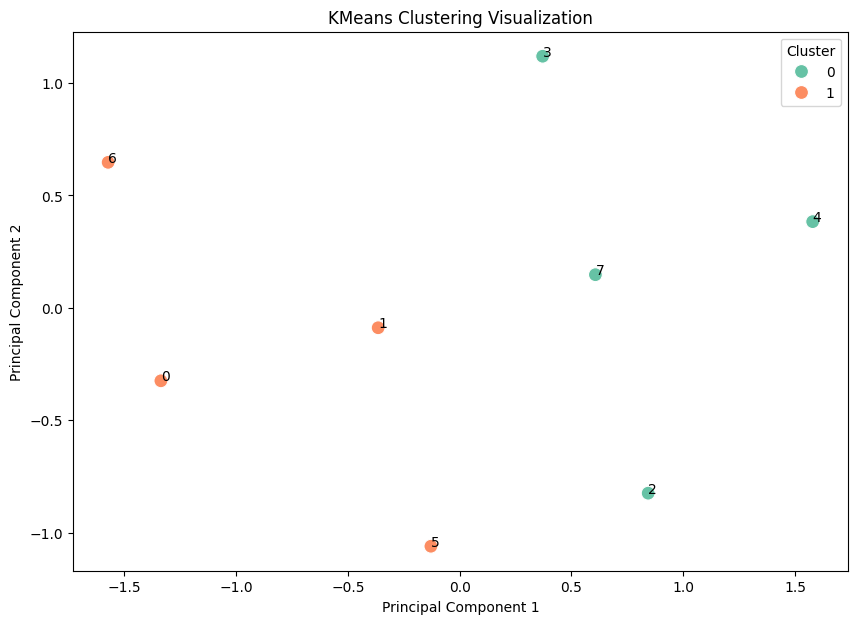

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Example data and model
X_train = np.array([[0, 1], [1, 1], [2, 0], [2, 2], [3, 1], [1, 0], [0, 2], [2, 1]])
y_train = np.array([0, 1, 0, 1, 1, 0, 0, 1])
model = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_train)

# Custom prediction function to simulate probability scores
def predict_fn(data):
    cluster_assignments = model.predict(data)
    # Simulate probability scores with 1 for the assigned cluster and 0 for the others
    probabilities = np.zeros((data.shape[0], model.n_clusters))
    for i, cluster in enumerate(cluster_assignments):
        probabilities[i, cluster] = 1
    return probabilities

# Explaining predictions
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['Feature 1', 'Feature 2'], class_names=[f'Cluster {i}' for i in range(model.n_clusters)], verbose=True, mode='classification')
instance = np.array([1, 2])
explanation = explainer.explain_instance(instance, predict_fn)
explanation.show_in_notebook()

# Plotting the clusters for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = model.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df.PC1[i], pca_df.PC2[i], str(i))
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
